# Exercise: 2.2 regression

## Omschrijving

In de vorige opdracht hadden we de gaten in de time series opgevuld.

## Leerdoelen

### Rolling mean
Als je naar de time series kijkt dan zien best veel pieken en dalen, dat is natuurlijk belangrijke kennis, maar kunnen we een lijn tekenen die wat minder grillig is waardoor we beter de lange termijn effecten kunnen zien.

Dat kan, dit heet een rolling mean. Hierbij trekken we een `window` van een specifieke grote over de time series en berekenen het gemiddelde van alle waardes in de window. Nu schuiven we de `window` 1 record op en berkenen het gemiddelde van alle waardes in de `window`. Dit proces herhalen we tot het einde van de time series.

### Seasonality
Bij time series wordt ook vaak verwezen naar `seasonality`. Hierbij spreken we dan over het terugkerende patroon in de tijd. Verjaardagen komen ieder jaar voor, dus een verjaardag heeft een terugkerend patroon van een jaar. Het weekend gebruiken veel mensen om te sporten / klussen. dus dit heeft een week patroon.

Soms heeft een time series meerdere seasonalities. Denk bijvoorbeeld aan boodschappen doen, de meeste zullen dit na werktijd doen en een aantal alleen in het weekend. Hier zitten dus 2 partonen in.

Bij de beurs koerzen is het moeilijker om de seasonality te bepalen, deze werken over meerdere tijdzones en zijn daarom moeilijker te voorspellen.

### Decompose
Decompose zegt het eigenlijk al, we gaan de time series afbreken (ontleden) in verschillende componenten. 

Het eerste component is de `trend`. De `trend` is een `rolling mean` van de time series van een specifieke window size. De grote van de window wordt statistisch bepaald. Het volgende component is de `seasonal`. De `seasonal` is het terugkerende patroon in de time series. Dit is niet afhankelijk van een bepaalde

## Opdracht

In [33]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# python core libraries
import os

# 3rd party libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# custom libraries
from src import visualize

# global variables
file_path = os.path.join(os.pardir, os.pardir, os.pardir, 'data', 'raw', '2.2.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lees de data in een pandas dataframe

In [19]:
ts = pd.read_csv(file_path, index_col=0)['quantity']

# ensure that the new index is a datetime index
ts.index = pd.to_datetime(ts.index)

Visualiseer de time series zoals we hem hebben achter gelaten

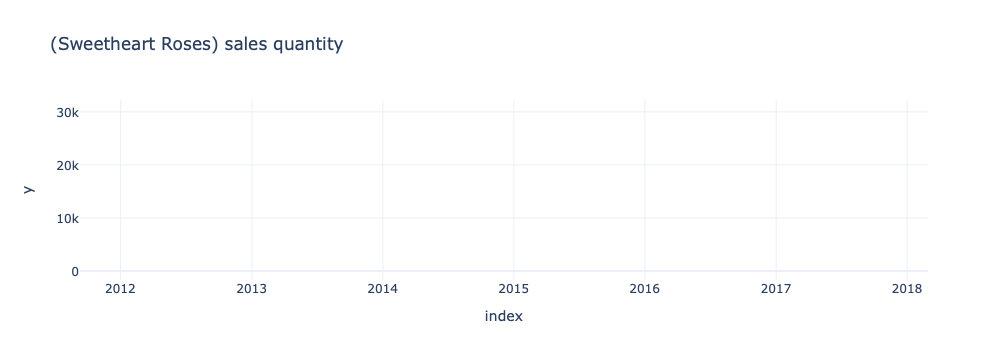

In [20]:
name = 'Sweetheart Roses'

visualize.time_series(ts, f'({name}) sales quantity')

## Nu jij

We zien dat de data best "grillig" is. hij schiet van laag naar hoog. Maak eens een rolling mean 
- maak eens een (plotly) plotje van een rolling mean + `ts_develop` ([rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html))
- speel met verschillende window sizes

Zoals je zult zien, hoe groter je de window size kiest hoe stabieler de data wordt. Laat nu eens de seasonality van de time series zie. 

Laten we eens alle jaren over elkaar heen leggen, zodat we 1 januari 2012 op hetzelfde x coordinaat ligt als 1 januari 2017
- visualiseer het jaar patroon in een (plotly) plotje
    - groepeer op `ts.index.year`
    - per groep stel de x in op `group.index.day_of_year`

Wat mij opvalt:
- Het eerste wat ik zie is dat de "kleine" piekjes niet lekker op elkaar liggen **probeer dit te verklaren**.
- Vanaf dag 0 (1 Januari) tot dag 30, lijkt er een neergaande trend te zijn.
- op dag 45 is er "ieder" jaar een piek **probeer dit te verklaren**
- dan is er ieder jaar een piek, maar niet op dezelfde datum **probeer dit te verklaren**
- in de zomer periode is het redelijk stabiel
- in het najaar begint de trend weer op te lopen
- en op dag (357, 358) is er ook ieder jaar een piek **probeer dit te verklaren**
- en op dag (359, 360) is er ook ieder jaar een dal **probeer dit te verklaren**

Probeer over deze vragen serieus na te denken. De kracht van deze plotjes is dat het vragen oproept, soms kan je de vragen beantwoorden, soms ook niet. Als je de vragen niet kan beantwoorden dan gebruik je de plotjes om met je collega's te bespreken wat je ziet. Komen jullie er niet uit, dan vraag je het aan de `domein expert`. De `domein expert` is iemand die alles van de materie weet hij werkt dagelijks met het product of de data en kan je vertellen wat er aan de hand is. 

Het beantwoorden van de vragen is belangrijk, het geeft je inzicht in wat belangrijk is en wat niet, en wat de oorzaken zijn van bepaalde situaties. Aan de hand van de inzichten die je opdoet kan je gemakkelijker de vervolg stappen bepalen, wat heeft van invloed op een model..., wat kunnen we er uit laten..., hoe gaan we om met ...

Soms heeft een time series meerdere patronen. We hebben net het jaar-patroon bekeken en beoordeeld laten we nu eens kijken naar het week-patroon. 

- maak een [boxplot](https://plotly.com/python/box-plots/#box-plot-with-plotlyexpress)
    - waarbij je per dag van de week (`x=ts.index.day_of_week') 
    - een boxplot maakt (`y=ts`)

Een boxplot vertelt heel veel over de spreiding van de data:
- de median is (ongeveer) hetzelfde als het gemiddelde
- de q1 en q3 zijn quantielen, binnen q1 en q3 valt 95% van de data
- de upper en lower fences zijn de statistische grenzen, alles daarbuiten (de punten) worden gezien als outliers (uitschieters)

Je kan dus aan een boxplot heel gemakkelijk zien waar het merendeel van de data zich bevindt en wat de spreiding is. Persoonlijk vind ik de [violin plot](https://www.explainxkcd.com/wiki/index.php/1967:_Violin_Plots) nog duidelijker, maar deze kunnen wat suggestiever overkomen.

Wat mij opvalt is dat het vanaf maandag (0) tot woensdag (2) redelijk stabiel is. De medians liggen nagenoeg gelijk en er is weinig sprijding. Vanaf donderdag (3) loopt het op tot en met zaterdag (5), waarna het op zondag (6) weer rustig wordt.

We hebben net de rolling mean bekeken en verschillende versies van de seasonality. We kunnen dit ook in 1x doen door de het signaal te decomposen.

- decompose de time series ([seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html))
- visualiseer de uitkomsten in 1 of meerdere subplots
    - visualiseer de [']

## Verwachte uitkomst

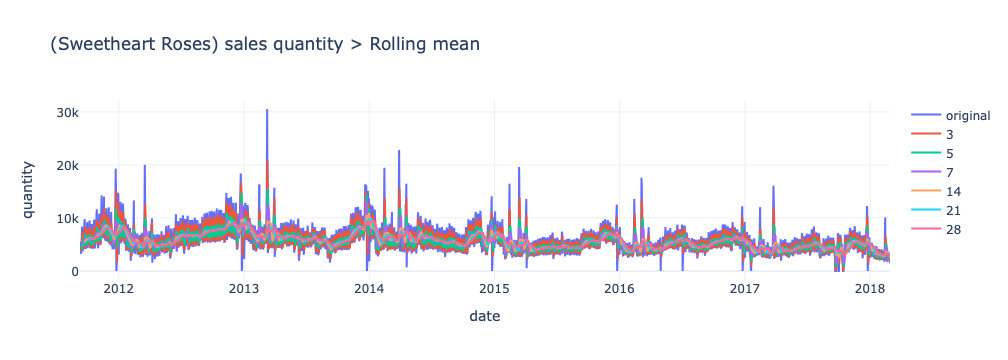

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=ts.index, y=ts, name='original', mode='lines'))
    
for window_size in [3, 5, 7, 14, 21, 28]:
    rolling = ts.rolling(window_size).mean()
    
    fig.add_trace(go.Scatter(x=rolling.index, y=rolling, name=window_size, mode='lines'))
fig.update_layout(title_text=f'({name}) sales quantity > Rolling mean')
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="quantity")
fig.show()

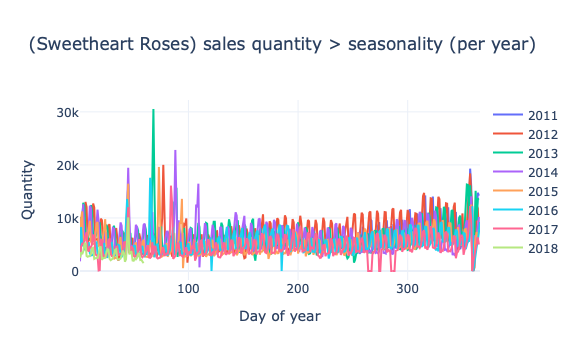

In [26]:
fig = go.Figure()

for year, group in ts.groupby(ts.index.year):
    fig.add_trace(go.Scatter(x=group.index.day_of_year, y=group, name=year, mode='lines'))
    
fig.update_layout(title_text=f'({name}) sales quantity > seasonality (per year)')
fig.update_xaxes(title_text="Day of year")
fig.update_yaxes(title_text="Quantity")

fig.show()

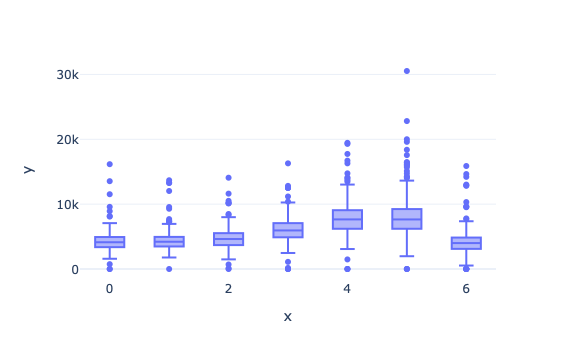

In [30]:
import plotly.express as px

fig = px.box(x=ts.index.day_of_week, y=ts)
fig.show()

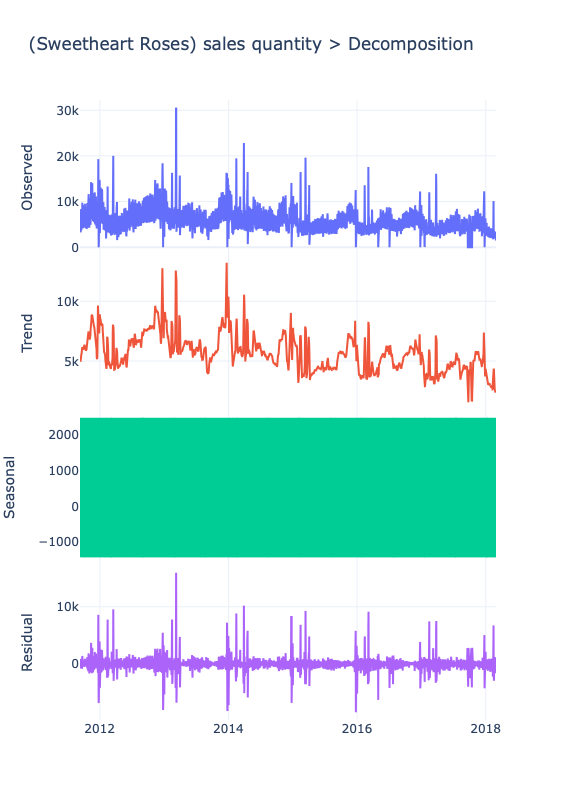

In [34]:
# decompose the time series
result = seasonal_decompose(ts)

fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0)

fig.append_trace(go.Scatter(x=result.observed.index, y=result.observed, name='observed'), row=1, col=1)
fig.append_trace(go.Scatter(x=result.trend.index, y=result.trend, name='trend'), row=2, col=1)
fig.append_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, name='seasonal'), row=3, col=1)
fig.append_trace(go.Scatter(x=result.resid.index, y=result.resid, name='residual'), row=4, col=1)

fig.update_layout(title_text=f'({name}) sales quantity > Decomposition', height=800, showlegend=False)
fig.update_yaxes(title_text="Observed", row=1, col=1)
fig.update_yaxes(title_text="Trend", row=2, col=1)
fig.update_yaxes(title_text="Seasonal", row=3, col=1)
fig.update_yaxes(title_text="Residual", row=4, col=1)

fig.show()